See [Github](https://github.com/matthewwritter/boston_real_estate_analysis) for project details

In [1]:
%matplotlib inline

In [17]:
import sandbox
reload(sandbox) # Since it's going to be updated in parallel with this notebook
import seaborn as sns

In [18]:
url_base = \
"https://api.enigma.io/v2/data/91fb1b95b413cb8504b3001347c3597a/df.co?page={}"
datalist = sandbox.download_data(
    url_base=url_base,
    max_downloads=0,
)

df = sandbox.clean_data(datalist, {'rad': 'improvement_cost', 'rah': 'done_by_self',
                           'ras': 'improvement_type_id'})
df.head()

,control,jrad,jras,improvement_cost,done_by_self,rahk,improvement_type_id,serialid
0,'208000003342','9','-9',794,'2','2',66,34501
1,'208000003342','9','-9',1588,'2','2',67,34502
2,'208000003344','-9','-9',3000,'2','2',45,34503
3,'208000003344','-9','-9',1500,'2','2',47,34504
4,'208000003344','-9','-9',1500,'2','2',55,34505


Get a sense of the most popular types of renovation (just using the ID codes for now)

In [19]:
df.improvement_type_id.value_counts().head()

53    2150
45    1982
47    1874
37    1716
61    1676
Name: improvement_type_id, dtype: int64

Take a look at the distributions of the top three

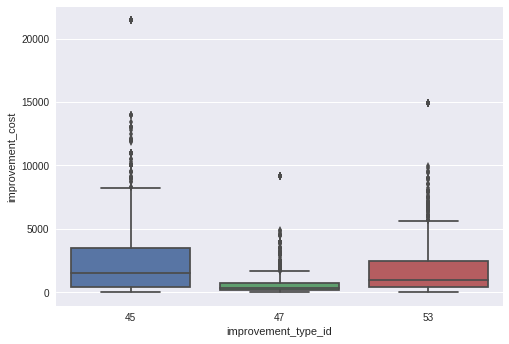

In [20]:
sns.boxplot(x='improvement_type_id',y='improvement_cost',data=df[df.improvement_type_id.isin([53,45,47])])

Removing outliers is certainly a possibility, but it can also be interesting to look at the output scaled by log 10

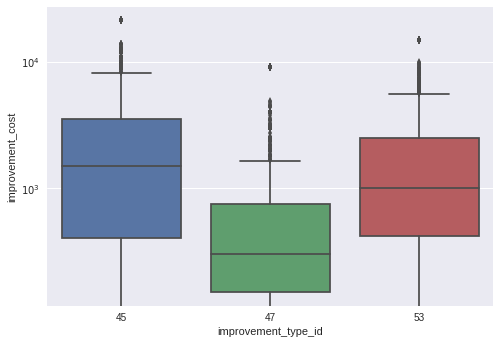

In [25]:
grid = sns.boxplot(x='improvement_type_id',y='improvement_cost',data=df[df.improvement_type_id.isin([53,45,47])])
grid.set(yscale="log");